# Analysis of Cepheid Variables

 Matric: 2663452m

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.stats
import scipy.special
import scipy.integrate
import scipy.interpolate
from scipy import constants as consts
import cepheid_variables_functions as cv
import os

title_size = 16
axis_size = 13
markersize = 4
linewidth = 1.5


## Aim

The aim of this experiment was to analyse data of the apparent magnitude of Cepheid Variable stars to determine a Period-Luminosity relationship.

## Introduction

Cepheid Variable Stars are a class of pulsating supergiants, which can be used to measure distances, as they are intrinsically bright. They are useful for this as there exists a relationship between their period (the time it takes for the star to complete one cycle of pulsation) and their luminosity. Which allows the absolute magnitude of a distant Cepheid to be determined.
The relationship to be determined in this experiemnt is:
(equation 1) 
$$ log_{10}\left(\frac{\bar{L}}{L_{solar}}\right) = alog_{10}P+b $$

Where $\bar{L}$ is the average luminosity of the Cepheid, $L_{solar}$ is the luminosity of the Sun, $P$ is the period of the Cepheid,, and $a$ and $b$ are constants.
Or Alternatively in terms of the absolute magnitude:
(equation 2)
$$ \bar{M_V} = Alog_{10}P+B $$
Where $A$ and $B$ are constants, and $\bar{M_V}$ is the absolute magnitude of the Cepheid.

Useful Equations Given in the Lab Script:
(equation 3)
$$m_{V}^{model} = m_{V0} + m_V\sin\left(\frac{2{\pi}t}{P} + \phi\right)$$
Where $m_{V0}$ is the mean magnitude of the Cepheid, $m_V$ is the amplitude of the Cepheid, $t$ is the time, $P$ is the period of the Cepheid, and $\phi$ is the phase of the Cepheid.

(equation 4)
$$\Chi^2 = \sum_{i=1}^{N}\frac{\left(m_{Vi}-m_{Vi}^{model}\right)^2}{\sigma^2}$$
Where $\sigma$ is the standard deviation of the data, and $N$ is the number of data points.

(equation 5)
$$m_V = M_V + 5log_{10}\left({d}\right)-5$$
Where $M_V$ is the apparent magnitude of the Cepheid and $d$ is the distance to the Cepheid.

(equation 6)
$$m_V = M_V + 5log_{10}\left({d}\right)-5 +A_V$$
Where $A_V$ is the extinction coefficient.

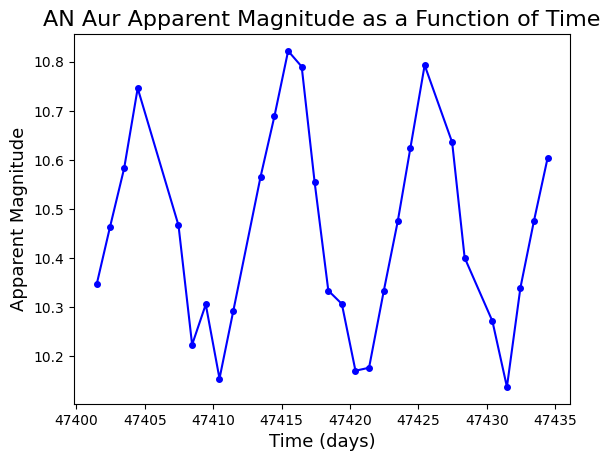

In [87]:
entries  = os.scandir('data_files/')

AN_Aur = np.loadtxt('data_files/AN_Aur_p.dat', unpack = True, usecols = [0,1])
plt.figure()
plt.plot(AN_Aur[0],AN_Aur[1],'o-', color = 'blue', markersize = markersize , linewidth = linewidth)
plt.title('AN Aur Apparent Magnitude as a Function of Time',  fontsize = title_size)
plt.xlabel('Time (days)', fontsize = axis_size)
plt.ylabel('Apparent Magnitude', fontsize = axis_size)
plt.show()


AN_Aur_time = AN_Aur[0]
AN_Aur_mag = AN_Aur[1]

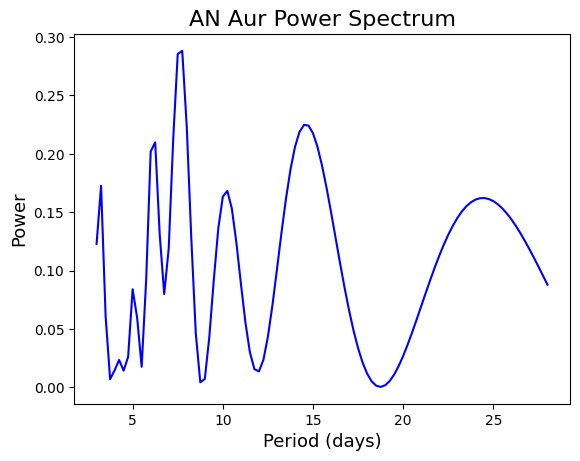

In [88]:
periods = np.linspace(3,28,101)
relative_time = AN_Aur_time - AN_Aur_time[0]
power = cv.powerSpectrum(relative_time, AN_Aur_mag, periods)

plt.figure()
plt.plot(periods, power, color = 'blue', linewidth = linewidth)
plt.title('AN Aur Power Spectrum',  fontsize = title_size)
plt.xlabel('Period (days)', fontsize = axis_size)
plt.ylabel('Power', fontsize = axis_size)
plt.show()


In [89]:
from scipy.signal import find_peaks
peaks_indices, _ = find_peaks(power, distance=5)
peaks_periods = periods[peaks_indices]

In [90]:
import os
path = 'data_files/'
file_list = [f for f in sorted(os.listdir(path))
             if f.endswith('.dat')]

for file in file_list:
    filename = path + file
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    print(file, peaks_periods)
    
    
    # plt.figure()
    # plt.plot(time, v_mag, 'o-')
    # plt.show()
    # plt.figure()
    # plt.plot(periods, power)
    # plt.show()
    
    

AN_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]
CH_Cas_p.dat [ 3.5   5.    7.25 10.   15.   26.25]
ER_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]
FM_Aql_p.dat [ 3.25  4.75  7.    9.5  13.   21.5 ]
GV_Aur_p.dat [ 4.25  5.5   7.75 13.25]
IN_Aur_p.dat [ 4.25  5.5   8.   13.5 ]
KK_Cas_p.dat [ 3.5   5.25  6.75  9.5  14.   23.5 ]
RS_Cas_p.dat [ 3.5   4.75  7.25 17.  ]
RX_Aur_p.dat [ 3.5   5.    6.25  7.75 11.5  22.25]
RY_Cas_p.dat [ 3.5   6.25  7.75 10.   15.25 23.75]
SW_Cas_p.dat [ 3.5   4.75  7.25 18.25]
SY_Aur_p.dat [ 3.25  4.75  6.    8.5  14.75]
SY_Cas_p.dat [ 4.25  6.5   8.25 11.25 15.25 25.25]
SZ_Aql_p.dat [ 4.    6.    7.5   9.75 14.5  24.75]
TT_Aql_p.dat [ 3.25  4.75  7.75 10.5  15.25 26.  ]
U_Aql_p.dat [ 4.5   6.75  9.75 12.5  17.25]
VW_Cas_p.dat [ 3.5   4.75  6.5   8.25 11.   24.75]
YZ_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.75 24.25]


AN_Aur_p.dat, Lowest Chi Value = 0.1005867144482902, Corresponding period that gives the lowest Chi value = 10.378319237201273, Correspondiong apparent visual magnitude = 10.467511684304139


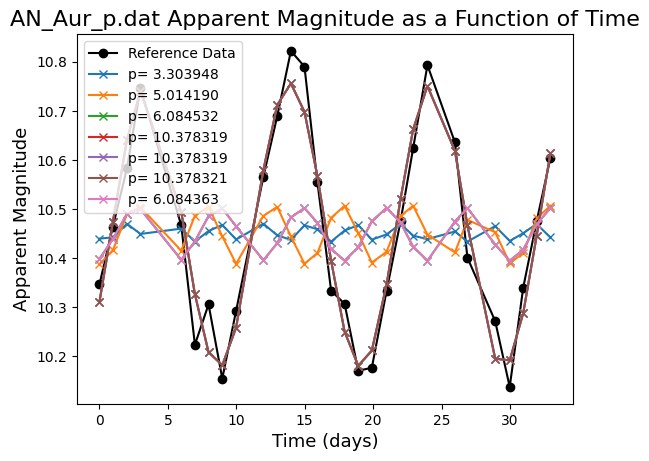

CH_Cas_p.dat, Lowest Chi Value = 0.515681238110853, Corresponding period that gives the lowest Chi value = 15.00867814825124, Correspondiong apparent visual magnitude = 11.043929067274714


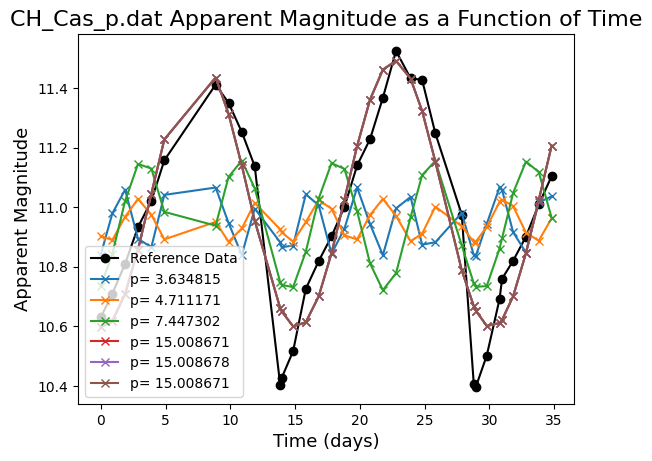

ER_Aur_p.dat, Lowest Chi Value = 0.48918397438911165, Corresponding period that gives the lowest Chi value = 15.64636717477836, Correspondiong apparent visual magnitude = 11.537648990731054


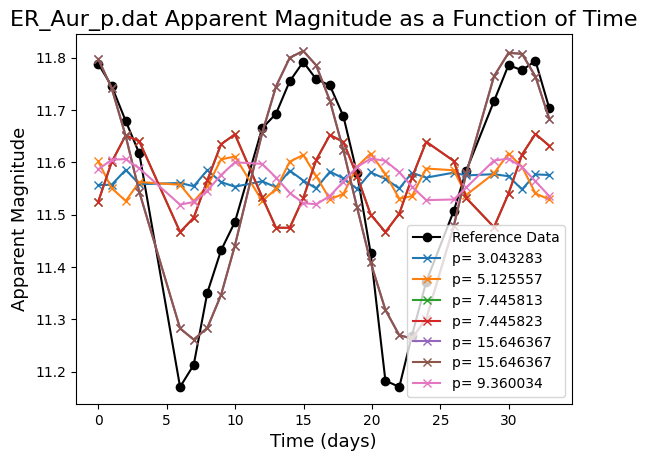

FM_Aql_p.dat, Lowest Chi Value = 1.4636156751018725, Corresponding period that gives the lowest Chi value = 4.692081540886748, Correspondiong apparent visual magnitude = 8.305202431776726


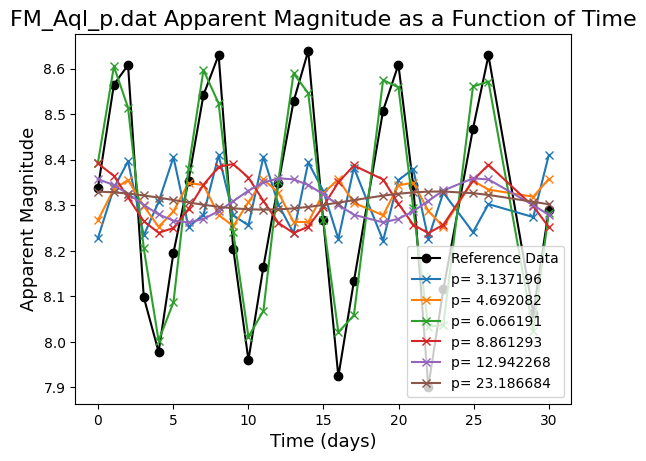

GV_Aur_p.dat, Lowest Chi Value = 0.851247074544121, Corresponding period that gives the lowest Chi value = 5.200409770813245, Correspondiong apparent visual magnitude = 12.092205069685194


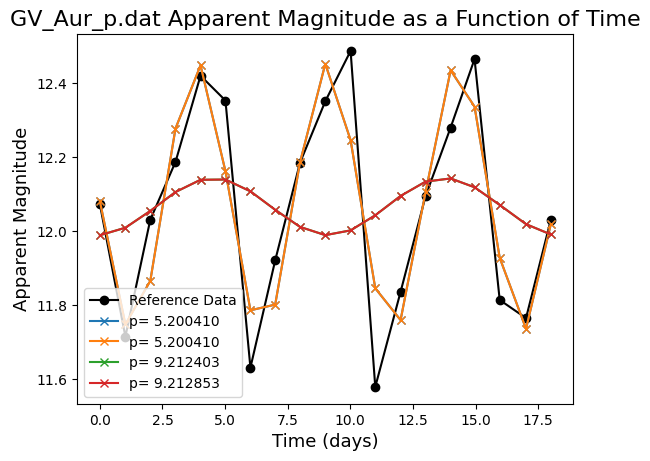

IN_Aur_p.dat, Lowest Chi Value = 0.6435329627895476, Corresponding period that gives the lowest Chi value = 11.52793281472431, Correspondiong apparent visual magnitude = 13.843119184922813


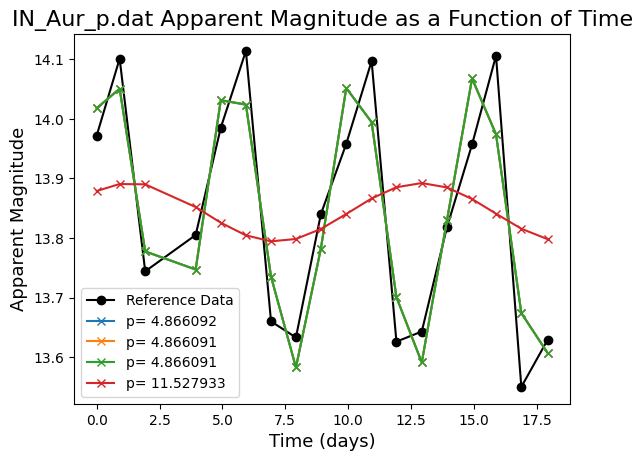

KK_Cas_p.dat, Lowest Chi Value = 1.1914656392352834, Corresponding period that gives the lowest Chi value = 5.252681531200824, Correspondiong apparent visual magnitude = 11.933978405352686


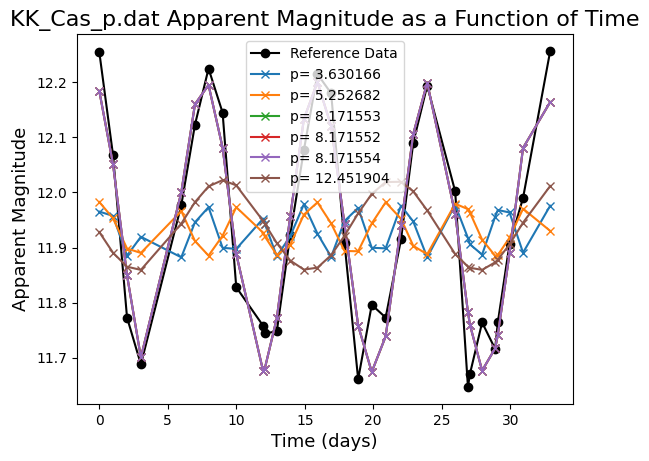

RS_Cas_p.dat, Lowest Chi Value = 1.2376432583836314, Corresponding period that gives the lowest Chi value = 3.5142663919566193, Correspondiong apparent visual magnitude = 9.912943776240283


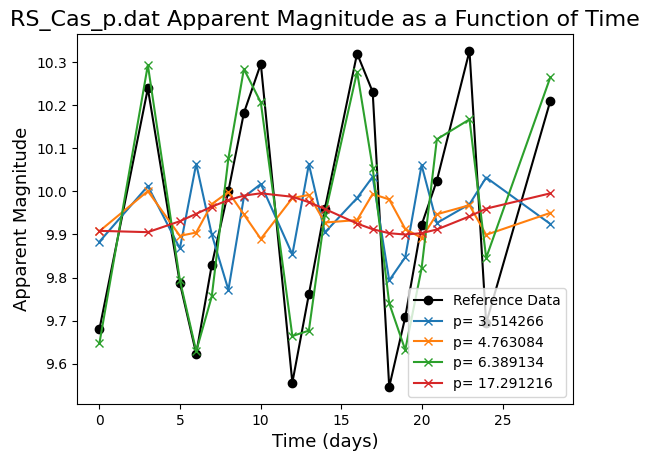

RX_Aur_p.dat, Lowest Chi Value = 0.06535035394038266, Corresponding period that gives the lowest Chi value = 11.63353391721981, Correspondiong apparent visual magnitude = 7.693879986437097


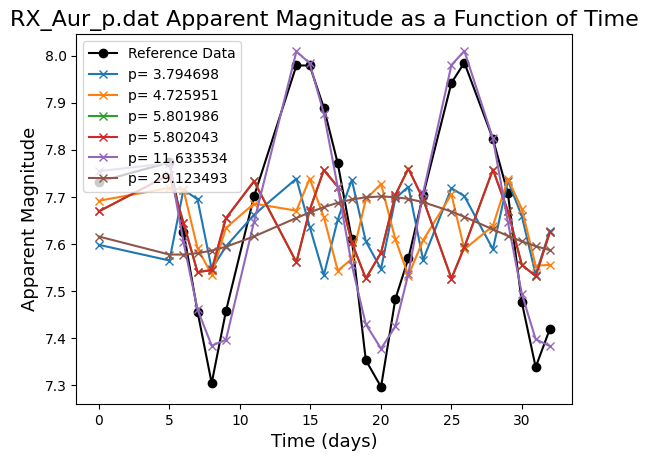

RY_Cas_p.dat, Lowest Chi Value = 3.161364345921464, Corresponding period that gives the lowest Chi value = 23.435802749265935, Correspondiong apparent visual magnitude = 9.977304119596708


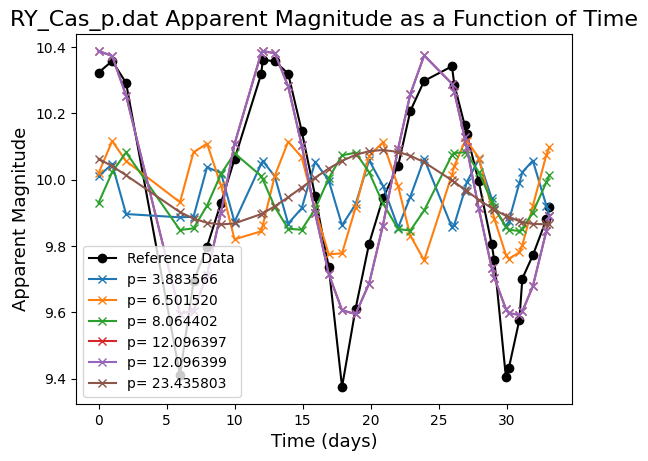

SW_Cas_p.dat, Lowest Chi Value = 0.6525453476411365, Corresponding period that gives the lowest Chi value = 7.629250605487511, Correspondiong apparent visual magnitude = 9.801468848793759


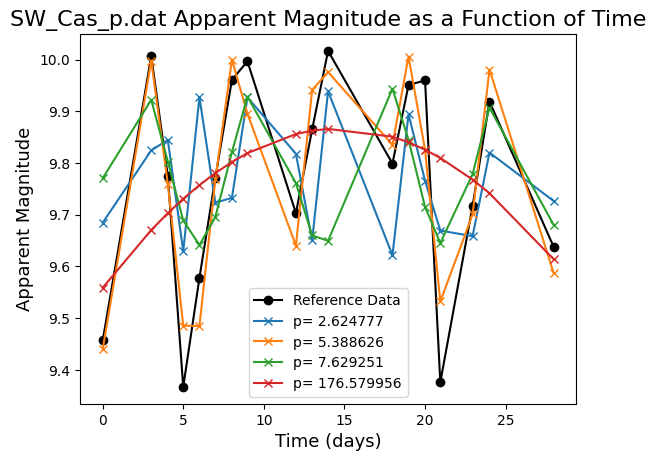

SY_Aur_p.dat, Lowest Chi Value = 0.9099157741667866, Corresponding period that gives the lowest Chi value = 5.818070311362427, Correspondiong apparent visual magnitude = 9.085453146858208


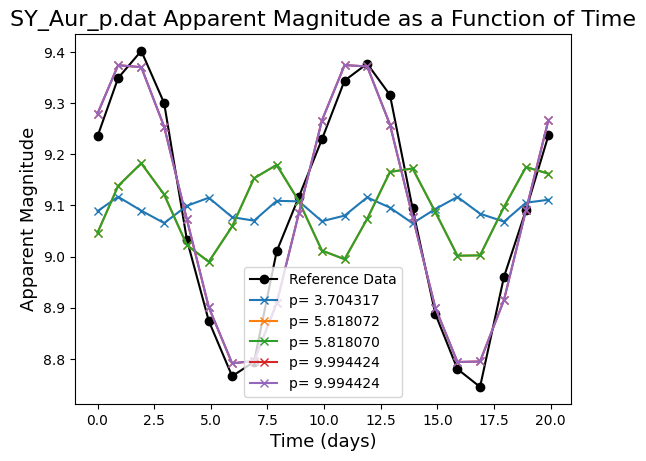

SY_Cas_p.dat, Lowest Chi Value = 2.6798872964125953, Corresponding period that gives the lowest Chi value = 8.302854720527787, Correspondiong apparent visual magnitude = 9.954689443157672


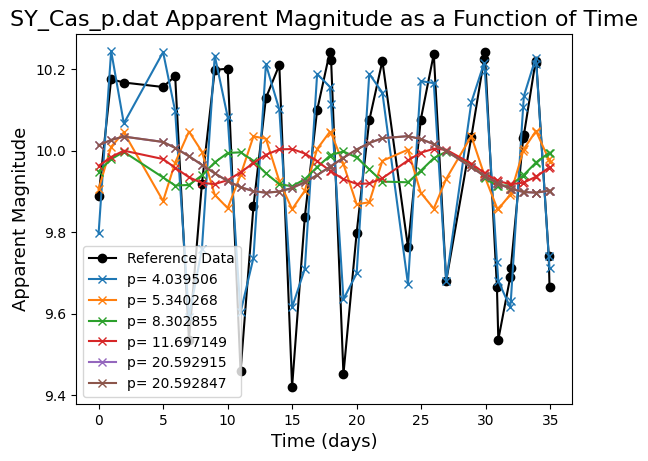

SZ_Aql_p.dat, Lowest Chi Value = 1.6962296719558492, Corresponding period that gives the lowest Chi value = 16.74328019624461, Correspondiong apparent visual magnitude = 8.606422505043746


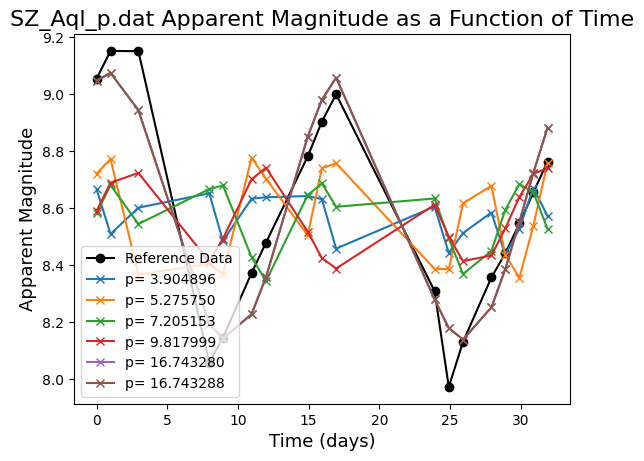

TT_Aql_p.dat, Lowest Chi Value = 2.9890268381573426, Corresponding period that gives the lowest Chi value = 13.67144677969176, Correspondiong apparent visual magnitude = 7.168514785274625


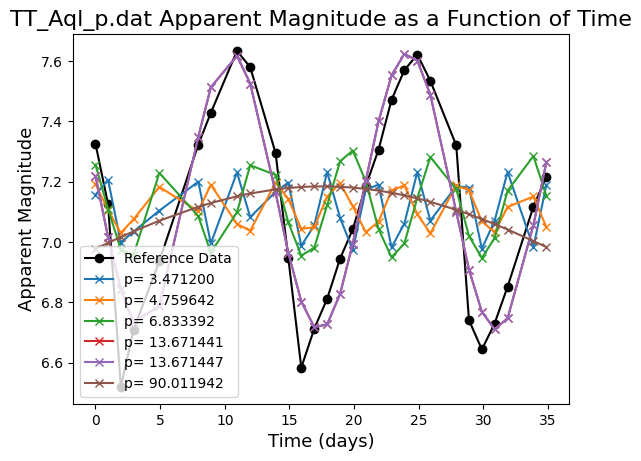

U_Aql_p.dat, Lowest Chi Value = 2.9810105496925425, Corresponding period that gives the lowest Chi value = 7.020473083376871, Correspondiong apparent visual magnitude = 6.425292281062091


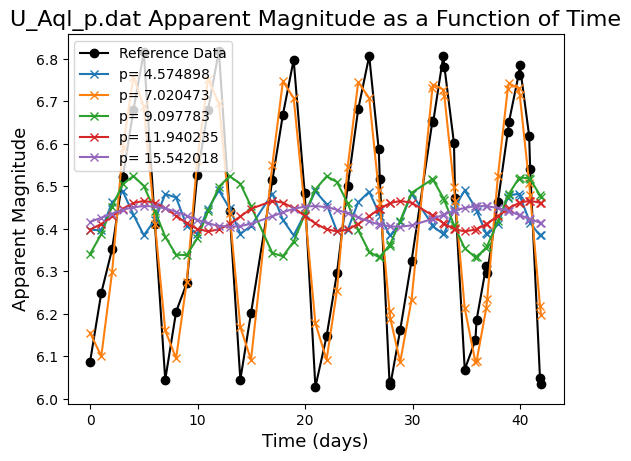

VW_Cas_p.dat, Lowest Chi Value = 1.418140189732802, Corresponding period that gives the lowest Chi value = 22.74445275968114, Correspondiong apparent visual magnitude = 10.711815001786352


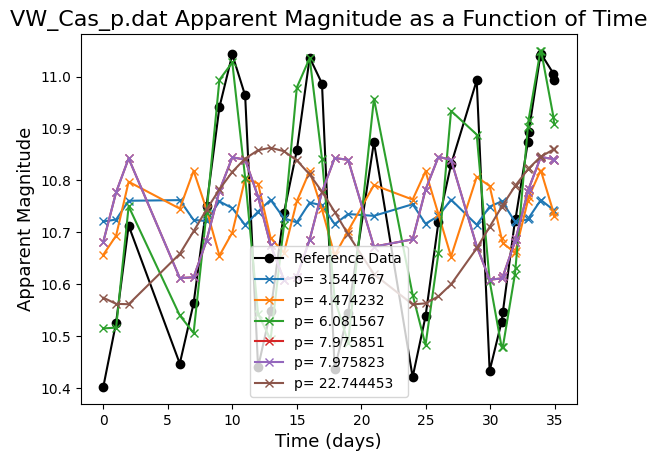

YZ_Aur_p.dat, Lowest Chi Value = 1.7682984799738046, Corresponding period that gives the lowest Chi value = 8.152135435079826, Correspondiong apparent visual magnitude = 10.397622930208138


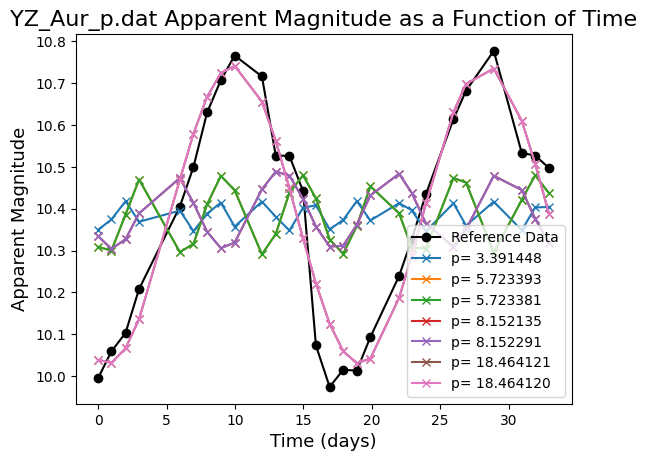

In [91]:
def func(t, m_v, phi,m_v0,P):
    return m_v0+m_v*(np.sin((2*np.pi*t/P) +phi))

chi_values = []
final_chi = []
final_period = []
final_apparent_visual_magnitude = []

for file in file_list:
    filename = path + file
    chilist = []
    fitted_period = []
    apparent_visual_magnitude = []
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    plt.figure()
    
    plt.plot(relative_time, v_mag, 'o-', color = 'black',label = 'Reference Data')
    for i in peaks_periods:
        m_v = (np.max(v_mag)-np.min(v_mag)/2)
        m_v0 = (np.sum(v_mag)/v_mag.size)
        relative_time = (time - time[0])
        popt, _ = scipy.optimize.curve_fit(func, relative_time, v_mag, p0 = [m_v0,m_v,1,i], maxfev = 50000)
        plt.plot(relative_time, func(relative_time, popt[0], popt[1], popt[2], popt[3]), 'x-', label = f'p= {popt[3]:2f}' )
        plt.title(f'{file} Apparent Magnitude as a Function of Time',  fontsize = title_size)
        plt.xlabel('Time (days)', fontsize = axis_size)
        plt.ylabel('Apparent Magnitude', fontsize = axis_size)
        plt.legend()
        chi = np.sum((v_mag-func(relative_time, popt[0], popt[1], popt[2], i))**2)
        chilist.append(chi)
        fitted_period.append(popt[3])
        apparent_visual_magnitude.append(popt[2])
    
    chilist_array = np.array((chilist))
    min_chilist_array = np.min(chilist_array)
    fitted_period_array = np.array(fitted_period)
    apparent_visual_magnitude_array = np.array(apparent_visual_magnitude)
    print(f'{file}, Lowest Chi Value = {np.min(chilist_array)}, Corresponding period that gives the lowest Chi value = {fitted_period_array[np.argmin(chilist_array)]}, Correspondiong apparent visual magnitude = {apparent_visual_magnitude_array[np.argmin(chilist_array)]}')
    final_chi.append(np.min(chilist_array))
    final_period.append(fitted_period_array[np.argmin(chilist_array)])
    final_apparent_visual_magnitude.append(apparent_visual_magnitude_array[np.argmin(chilist_array)])
    plt.show()
    star_data = {'file': file_list,"chi": final_chi, 'period': final_period, 'apparent_visual_magnitude': final_apparent_visual_magnitude}
    


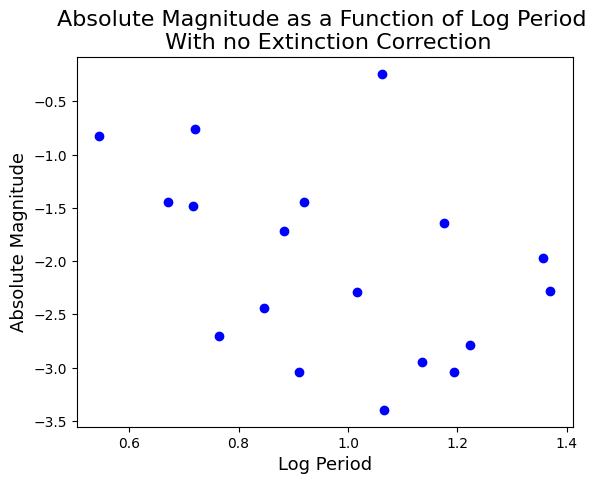

In [92]:
colour_band = np.loadtxt('data_files/colour_band.txt')
distance = np.loadtxt('data_files/distance.txt')
log_per = np.log10(star_data['period'])
M_V = []

for i in range(len(final_apparent_visual_magnitude)):
    abs_mag_vis = final_apparent_visual_magnitude[i] - 5*np.log10(distance[i]) + 5
    M_V.append(abs_mag_vis)

def straight(x, m, c):
    return m*x + c

popt, pcov = scipy.optimize.curve_fit(straight, log_per, M_V, p0 = [-2,-1])
plt.figure()
plt.scatter(log_per, M_V, color = 'blue')
plt.title('Absolute Magnitude as a Function of Log Period \n With no Extinction Correction',  fontsize = title_size)
plt.xlabel('Log Period', fontsize = axis_size)
plt.ylabel('Absolute Magnitude', fontsize = axis_size)
plt.show()

        

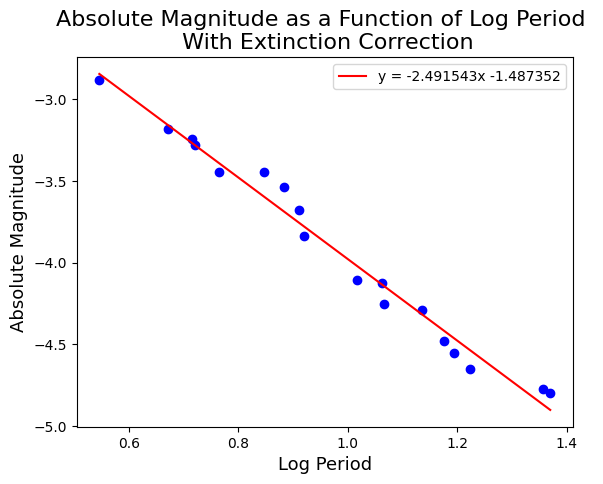

The gradient of the line is -2.491543 and the y-intercept is -1.487352 


In [93]:
M_V2 = []
Av = 3.1*colour_band
log_per = np.log10(star_data['period'])

for i in range(len(final_apparent_visual_magnitude)):
    abs_mag_vis = final_apparent_visual_magnitude[i] - (5*np.log10(distance[i])) + 5 - Av[i]
    M_V2.append(abs_mag_vis)
    
def straight(x, m, c):
    return m*x + c

M_V2_sort = np.sort(M_V2)
log_per_sort = np.sort(log_per)[::-1]

popt, pcov = scipy.optimize.curve_fit(straight, log_per_sort, M_V2_sort, p0 = [-2.5,-1])
curve = straight(log_per_sort, popt[0], popt[1])
plt.figure()
plt.scatter(log_per_sort, M_V2_sort, color = 'blue')
plt.title('Absolute Magnitude as a Function of Log Period \n With Extinction Correction',  fontsize = title_size)
plt.xlabel('Log Period', fontsize = axis_size)
plt.ylabel('Absolute Magnitude', fontsize = axis_size)
plt.plot(log_per_sort, curve, '-', color = 'red', label = f'y = {popt[0]:2f}x {popt[1]:2f}')
plt.legend()
plt.show()
print(f'The gradient of the line is {popt[0]:2f} and the y-intercept is {popt[1]:2f} ')



In [1]:
#extra stuff
        
        #chi = np.sum((v_mag-func(relative_time, popt[0], popt[1], popt[2], i))**2)
        
        #print(chi)
        #chi_values.append(chi)
    

        # if chi < chi_test:
        #     chi_test = chi
        #     print( chi_test)
        #     print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi_test)
            #print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi)
        
    #plt.show()
    #plt.legend(['Ex Data', ])
    #plt.plot(time,func(time,popt[0],popt[1],popt[2],i))
        #for j in popt:
         #   sp.stats.chisquare((v_mag),func(time,popt[0],popt[1],popt[2],j))
        #  print(np.min(j))
        





         # if chi < chi_test:
        #     chi_test = chi
            
        #     print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi_test)
        #     #print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi)
        
        # mins = []
        # for j in chi_values:
        #     mins.append(np.min(j))
        #     #print(chi_values.index([j[np.min[j]]]))
            
    # chi_values.append(chilist) 

"\n        if chi < chi_test:\n            chi_test = chi\n            print( chi_test)\n            print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi_test)\n            #print('The period that provides the best fit for the data is', popt[3], 'days' and 'with a Chi squared value of', chi)\n        "

[47401.494  47402.4685 47403.4987 47404.4881 47407.4693 47408.4656
 47409.4616 47410.4654 47411.4759 47413.4681 47414.4786 47415.4801
 47416.4735 47417.4154 47418.4182 47419.4068 47420.4007 47421.3944
 47423.4931 47424.4125 47425.4581 47427.4678 47428.3866 47430.4132
 47432.4616 47433.4419 47434.4518]
